<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica20_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practica 20#:  Practicas sobre normalización y transformación de datos

**Enlace repositorio github:** https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica20_SergioTrejo.ipynb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


Pruebas de normalizacion de los datos originales:
 ShapiroResult(statistic=np.float64(0.9818041416927711), pvalue=np.float64(0.020047981728854945))
 Los datos no siguen una distribucion normal (se rechaza H0).
Pruebas de normalizacion de los datos escaladops:
 ShapiroResult(statistic=np.float64(0.9818041416927711), pvalue=np.float64(0.020047981728854858))
 Los datos no siguen una distribucion normal (se rechaza H0).

Graficas de los datos originales y escalados


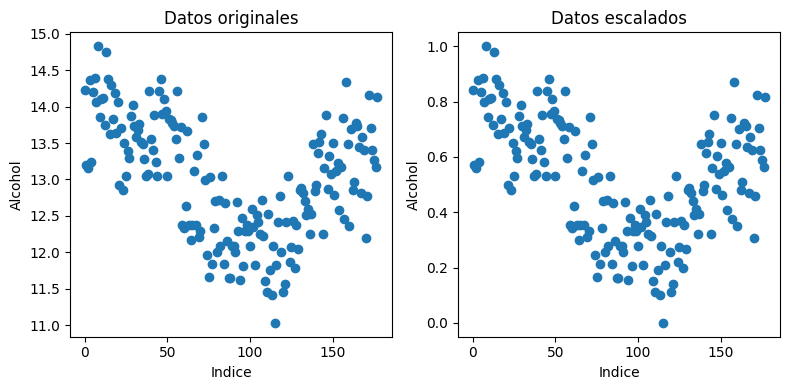

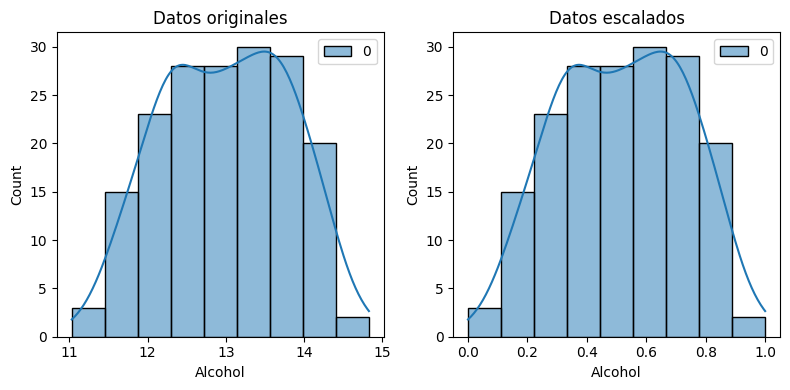

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy import stats

#1. carga del dataset winde de sklearn
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

# 2. Seleccionar una de las caracteristicas numericas(por ejemplo, alcohol)
alcohol = df['alcohol'].values.reshape(-1,1)

# 3. Realizar una prueba de normalidad(usando scipy.stats.shapiro) sobre los datos originales
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(alcohol)
print("Pruebas de normalizacion de los datos originales:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

# 4. Aplicar normalizacion Min-Max a los datos seleccionados.
scaler = MinMaxScaler(feature_range=(0,1))
alcohol_scaled = scaler.fit_transform(alcohol)

# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(alcohol_scaled)
print("Pruebas de normalizacion de los datos escaladops:\n", shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

# 6. Graficar los datos originales y lor normalizados utilzando matplotlib o seaborn.

print("\nGraficas de los datos originales y escalados")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(range(len(alcohol)), alcohol, label='Original')
plt.title('Datos originales')
plt.xlabel('Indice')
plt.ylabel('Alcohol')

plt.subplot(1,2,2)
plt.scatter(range(len(alcohol_scaled)), alcohol_scaled, label='Escalado')
plt.title('Datos escalados')
plt.xlabel('Indice')
plt.ylabel('Alcohol')

plt.tight_layout()
plt.show()

#Distribucion de los datos antes y despues de la normalizacion con Max-Min Scale
#Original
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(alcohol, kde=True, label='Original')
plt.title('Datos originales')
plt.xlabel('Alcohol')

#Escalado
plt.subplot(1,2,2)
sns.histplot(alcohol_scaled, kde=True, label='Escalado')
plt.title('Datos escalados')
plt.xlabel('Alcohol')

plt.tight_layout()
plt.show()


**7. Responder las preguntas siguientes.Preguntas:**

Preguntas:

1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?

  * Al momento de aplicar la normalizacion con Min-Max la escala de la variable alcohol, la escala cambio el rango de 0 a 1, pero no se modifico la distribucion. En otras palabras, los datos mantuvieron el mismo comportamiento y las mismas tendencias. Segun las prueba de normalidad, la distribucion de esta variable no seguir una forma normal, lo que al aplicar la normalizacion o escala de los datos, no tendria que haver afectado la distribucion.

2. ¿Qué interpretas del p-valor antes y después de la normalización?
  * El p-value antes de la normalizacion era menor que 0.05, lo que falla para comprobar que los datos siguen una distribucion normal. Despues de aplicar el Min-Max, el p-value se mantiene practicamente igual, confirmando que la normalizacion no cambia su distribucion, solo escala o ajusta los valores.

# Ejercicio 2: Normalización Z-Score

Instrucciones:

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



Pruebas de normalizacion de los datos originales:
 ShapiroResult(statistic=np.float64(0.8887839752895415), pvalue=np.float64(2.945800703600761e-10))
 Los datos no siguen una distribucion normal (se rechaza H0).
Pruebas de normalizacion de los datos escalados:
 ShapiroResult(statistic=np.float64(0.8887839752895408), pvalue=np.float64(2.9458007036005247e-10))
 Los datos no siguen una distribucion normal (se rechaza H0).

Graficas de los datos originales y escalados


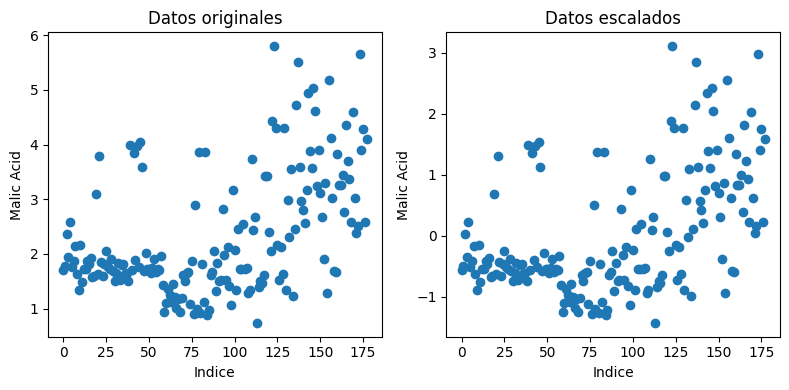

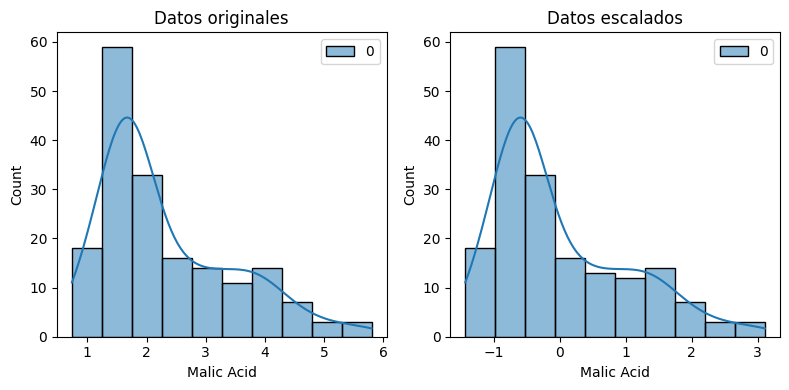

In [20]:
# 1. Cargar el dataset wine de sklearn.
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

# 2.Seleccionar una de las características numéricas (por ejemplo, malic_acid).
malic_acid = df['malic_acid'].values.reshape(-1,1)

# 3.Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(malic_acid)
print("Pruebas de normalizacion de los datos originales:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

# 4. Aplicar la normalización Z-Score a los datos seleccionados.
scaler = StandardScaler()
malic_acid_scaled = scaler.fit_transform(malic_acid)

# 5.Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(malic_acid_scaled)
print("Pruebas de normalizacion de los datos escalados:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

# 6.Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
print("\nGraficas de los datos originales y escalados")


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(range(len(malic_acid)), malic_acid, label='Original')
plt.title('Datos originales')
plt.xlabel('Indice')
plt.ylabel('Malic Acid')

plt.subplot(1,2,2)
plt.scatter(range(len(malic_acid_scaled)), malic_acid_scaled, label='Escalado')
plt.title('Datos escalados')
plt.xlabel('Indice')
plt.ylabel('Malic Acid')

plt.tight_layout()
plt.show()

#Distribucion de los datos antes y despues de la normalizacion con Z-Score Scale
#Original
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(malic_acid, kde=True, label='Original')
plt.title('Datos originales')
plt.xlabel('Malic Acid')

#Escalado
plt.subplot(1,2,2)
sns.histplot(malic_acid_scaled, kde=True, label='Escalado')
plt.title('Datos escalados')
plt.xlabel('Malic Acid')

plt.tight_layout()
plt.show()




**7. Responder las preguntas siguientes.Preguntas:**

1. ¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

* La normalizacion con metodo Z-Score no cambia la forma de la distrubucion, pero si reescala los valores para que la media sea igual a 0 y la desviacion estandard = 1. En otras palabras, los datos siguen teniendo el mismo comportamiento, solo que ahora estan centrados en 0. En las graficas se nota que la forma es practicamente la misma, pero la escala del eje vertical cambio.

2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

* Es importante que el z-score no corrige los sesgos de los datos, en este caso se utilizo para tratar las variables que tienen diferentes unidades y magnitudes ya que todas quedas en la misma escala estadistica. Es muy util en modelos que dependen de la varianza o de distancias.



##  Ejercicio 3: Transformación Logarítmica

Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


Pruebas de normalizacion de los datos originales:
 ShapiroResult(statistic=np.float64(0.8108047194030484), pvalue=np.float64(1.1860783845090652e-32))
 Los datos no siguen una distribucion normal (se rechaza H0).
Pruebas de normalizacion de los datos transformados:
 ShapiroResult(statistic=np.float64(0.9332335966927751), pvalue=np.float64(9.990233730142175e-21))
 Los datos no siguen una distribucion normal (se rechaza H0).

Graficas de los datos originales y transformados


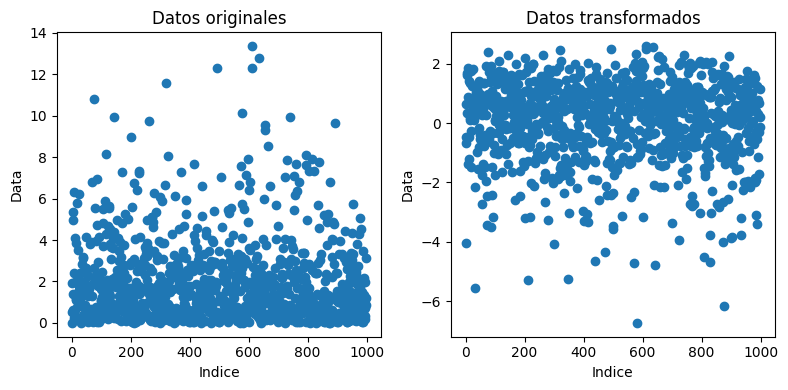

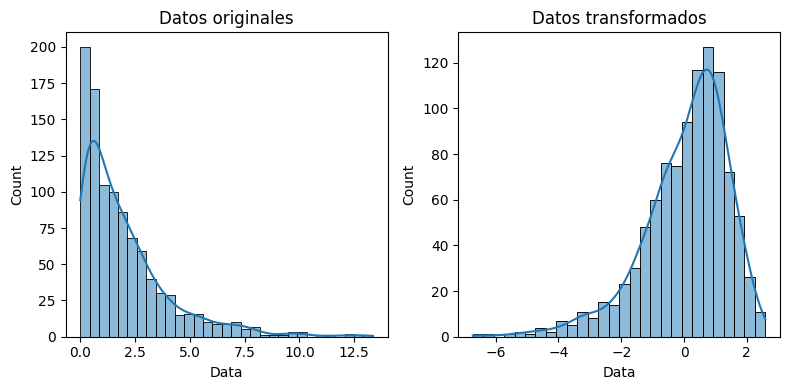

In [27]:
#1. Cargar un conjunto de datos aleatorios generados con numpy.
data = np.random.exponential(scale=2, size=1000)


#2. Aplicar una transformación logarítmica (np.log) a los datos.
data_log = np.log(data)

#3. Realizar una prueba de normalidad sobre los datos originales y transformados.

#Datos originales
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data)
print("Pruebas de normalizacion de los datos originales:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

#Datos transformados
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data_log)
print("Pruebas de normalizacion de los datos transformados:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")


#4. Graficar los datos originales y transformados utilizando matplotlib.
print("\nGraficas de los datos originales y transformados")


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(range(len(data)),data, label='Original')
plt.title('Datos originales')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.subplot(1,2,2)
plt.scatter(range(len(data_log)),data_log, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.tight_layout()
plt.show()

#Distribucion de los datos antes y despues de la normalizacion con Z-Score Scale
#Original
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data, kde=True, label='Original')
plt.title('Datos originales')
plt.xlabel('Data')

#Transformado
plt.subplot(1,2,2)
sns.histplot(data_log, kde=True, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Data')

plt.tight_layout()
plt.show()



**5. Responder las preguntas siguientes.Preguntas:**

1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?

* Despues de aplicar la transformacion algoritmica se puede notar que la asimetria de la distribucion se redujo un poco. Los datos se ven un poco mas simetricos y cercanos a una distribucion normal. En los graficos se puede observar que los datos grandes se comprimen un poco y los pequeños se separan, lo que suaviza la cola de la derechade la distribucion original. El algoritmo ayudo a estabilizar la distribucion a una forma un poco mas normal.

2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?

*  Antes de aplicar el logaritmo, el p-value fue menor que 0.05m indicando que los datos no seguian una distribucion normal. Despues de aplicar la transformacion logaritmica, el p-value aumento lo que muestra que los datos se acercaron mas a una distribucion normal, aunque siguen siendo en teoria aun no normales. Esto confirmar que la transformacion algoritmica suavizo o ayudo a reducir el sesgo en la distribucion.

## Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


Pruebas de normalizacion de los datos originales:
 ShapiroResult(statistic=np.float64(0.8427755902632218), pvalue=np.float64(2.5284661683007674e-30))
 Los datos no siguen una distribucion normal (se rechaza H0).
Pruebas de normalizacion de los datos transformados:
 ShapiroResult(statistic=np.float64(0.9782712805723494), pvalue=np.float64(4.510648064441115e-11))
 Los datos no siguen una distribucion normal (se rechaza H0).

Graficas de los datos originales y transformados


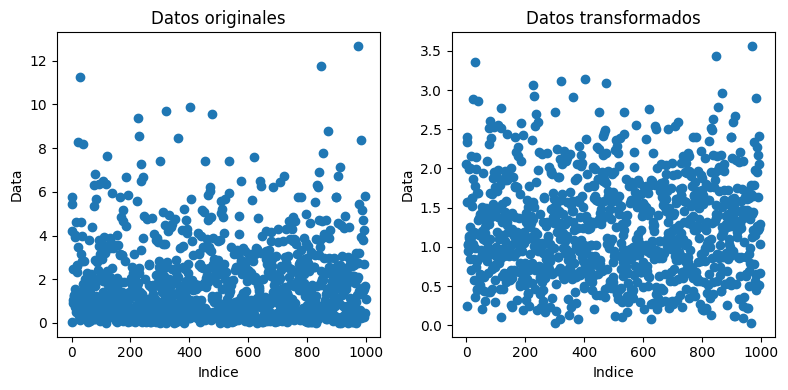

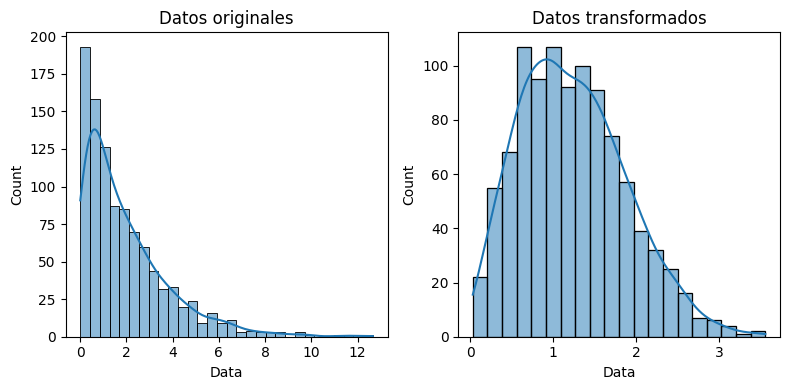

In [28]:
#1.  Cargar un conjunto de datos aleatorios generados con numpy.
data = np.random.exponential(scale=2, size=1000)

#2.  Aplicar una transformación de raíz cuadrada a los datos.
data_sqrt = np.sqrt(data)

#3. Realizar una prueba de normalidad sobre los datos originales y transformados.

#Datos originales
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data)
print("Pruebas de normalizacion de los datos originales:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

#Datos tranformados
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data_sqrt)
print("Pruebas de normalizacion de los datos transformados:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

#4. Graficar los datos originales y transformados utilizando matplotlib.
print("\nGraficas de los datos originales y transformados")


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(range(len(data)),data, label='Original')
plt.title('Datos originales')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.subplot(1,2,2)
plt.scatter(range(len(data_sqrt)),data_sqrt, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.tight_layout()
plt.show()

#Distribucion de los datos antes y despues de la normalizacion con Z-Score Scale
#Original
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data, kde=True, label='Original')
plt.title('Datos originales')
plt.xlabel('Data')

#Transformado
plt.subplot(1,2,2)
sns.histplot(data_sqrt, kde=True, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Data')

plt.tight_layout()
plt.show()


**5. Responder las preguntas siguientes.Preguntas:**

1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?

* La transformacion de raiz cuadraredujo la asimetria de la distribucion, haciendo que los datos que se vean mas equilibrados y menos sesgados hacia a la derecha. En el histograma se nota como la forma original que tenia una cola larga, se vuelve mas compacta y simetrica. El metodo de la raiz cuadrada suaviza la variabilidad entre valores grandes y pequeños, acercando los datos a una forma mas parecida a la normal.

2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?

* La raiz cuadrada disminuye la influencia de los valores atipicos o outliers, comprime los numeros grandes mas que los pequeños. Esto hace que los datos muy grandes pierdad parte de su peso en la distribucionm ayudando a estabilizar la  varianza y evitar que solo unos pocos valores dominen el analisis.

## Ejercicio 5: Transformación Box-Cox
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


Valor óptimo de lambda (λ): 0.2844
Pruebas de normalizacion de los datos originales:
 ShapiroResult(statistic=np.float64(0.7950196984529578), pvalue=np.float64(1.091106663997354e-33))
 Los datos no siguen una distribucion normal (se rechaza H0).
Pruebas de normalizacion de los datos transformados:
 ShapiroResult(statistic=np.float64(0.9974276423700879), pvalue=np.float64(0.11540158583567284))
No se rechaza H0: los datos siguen una distribucion normal.

Graficas de los datos originales y transformados


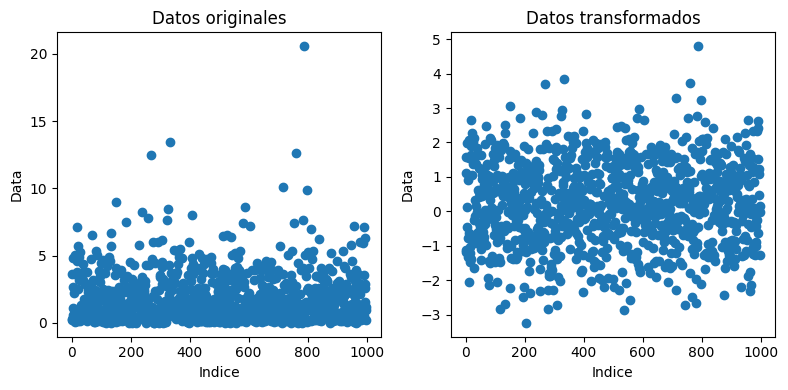

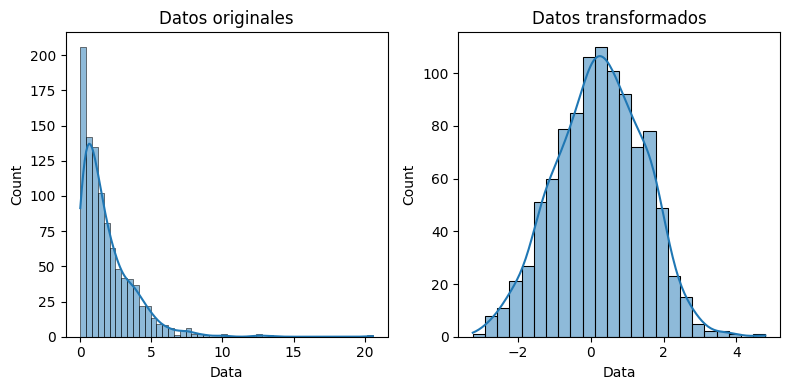

In [31]:
#1. Cargar un conjunto de datos aleatorios generados con numpy.
data = np.random.exponential(scale=2, size=1000)

#2. Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
data_boxcox, lambda_value = stats.boxcox(data)
print(f"Valor óptimo de lambda (λ): {lambda_value:.4f}")

#3. Realizar una prueba de normalidad sobre los datos originales y transformados.
#Datos originales
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data)
print("Pruebas de normalizacion de los datos originales:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

#Datos tranformados
alpha = 0.05  # Nivel de significancia
shapiro_test = stats.shapiro(data_boxcox)
print("Pruebas de normalizacion de los datos transformados:\n",shapiro_test)

if shapiro_test.pvalue < alpha:
    print(" Los datos no siguen una distribucion normal (se rechaza H0).")
else:
    print("No se rechaza H0: los datos siguen una distribucion normal.")

#4. Graficar los datos originales y transformados utilizando matplotlib.
print("\nGraficas de los datos originales y transformados")


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(range(len(data)),data, label='Original')
plt.title('Datos originales')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.subplot(1,2,2)
plt.scatter(range(len(data_boxcox)),data_boxcox, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Indice')
plt.ylabel('Data')

plt.tight_layout()
plt.show()

#Distribucion de los datos antes y despues de la normalizacion con Z-Score Scale
#Original
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data, kde=True, label='Original')
plt.title('Datos originales')
plt.xlabel('Data')

#Transformado
plt.subplot(1,2,2)
sns.histplot(data_boxcox, kde=True, label='Transformado')
plt.title('Datos transformados')
plt.xlabel('Data')

plt.tight_layout()
plt.show()



**5. Responder las preguntas siguientes.Preguntas:**

1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
* La transformacion de box-cox redujo el sesgo de la distribucion original, haciendo que los datos se volvieran mas simetricos y se acercaran a una forma mas parecidad a la distribucion normal. En las graficas se observa como la cola derecha de las distribucion se comprime, y los valores se concentran alrededor del centro. Esta transformacion ayudo a estabilizar la varianza y suavisar la influencia de los valores extremos. Despues de la tranformacion tenemos una distribucion normal.

2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
* El valor de lambda indica que tipo de ajuste se realizo en la transformacion para lograr que los datosa se transformaran en una distribucion normal.

  * Si λ ≈ 1, la transformacion es casi lineal (los datos ya eran bastante normales).

  * Si λ ≈ 0, el resultado se parece a una transformacion logaritmica.

  * Si λ ≈ 0.5, es similar a una raíz cuadrada.

En este caso, el valor óptimo de λ fue calculado automaticamente por el metodo de maxima verosimilitud, buscando el mejor equilibrio para reducir la asimetría y la dispersión en los datos.
